In [1]:
#importing libraries 
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
#reading csv file as pandas dataframe
df=pd.read_csv('country_vaccinations.csv')
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,10-01-2021,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,11-01-2021,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,12-01-2021,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,13-01-2021,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,14-01-2021,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [3]:
#taking only records of India
df=df.iloc[1891:1935]

In [4]:
#for linear regression we are predicting total vaccinations vs the date so we only require 2 columns from the dataset
dataset=df
dataset=dataset.iloc[:,2:4]
dataset=dataset.dropna()
dataset.head()

,date,total_vaccinations
1891,15-01-2021,0.0
1892,16-01-2021,191181.0
1893,17-01-2021,224301.0
1894,18-01-2021,454049.0
1895,19-01-2021,674835.0


In [5]:
#as total_vaccinations is being predicted on the basis of a certain date we take total 
#vaccinations as Y(dependent) and date as X(Independet)
#X=dataset.iloc[:,[0]]
X=pd.DataFrame(np.array(range(0,43))).values
Y=dataset.iloc[:,[1]].values
#X=X.reshape(-1,1)

Y

array([[       0.],
       [  191181.],
       [  224301.],
       [  454049.],
       [  674835.],
       [  806484.],
       [ 1043534.],
       [ 1390592.],
       [ 1582201.],
       [ 1615504.],
       [ 2023809.],
       [ 2029480.],
       [ 2355979.],
       [ 2928053.],
       [ 3500027.],
       [ 3744334.],
       [ 3758843.],
       [ 3950156.],
       [ 4138918.],
       [ 4449552.],
       [ 4959445.],
       [ 5416849.],
       [ 5775322.],
       [ 5812362.],
       [ 6259008.],
       [ 6611561.],
       [ 7017114.],
       [ 7505010.],
       [ 7967647.],
       [ 8052454.],
       [ 8516771.],
       [ 8857341.],
       [ 9186757.],
       [ 9846523.],
       [10449942.],
       [10838323.],
       [11085173.],
       [11424094.],
       [11907392.],
       [12366633.],
       [13067047.],
       [13756940.],
       [14242547.]])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)

In [7]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_train,Y_train,color='black')
plt.plot(X_train,linear.predict(X_train),color='blue')
plt.show()

<Figure size 640x480 with 1 Axes>

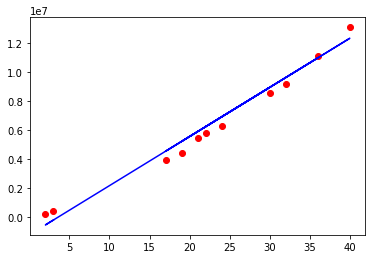

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,linear.predict(X_test),color='blue')
plt.show()

In [10]:
#MARCH 15th is 59 days from january 15th as our data begins from january 15th
linear.predict([[59]])


array([[18728135.12388818]])

In [11]:
print(f'accuraccy is {linear.score(X_test,Y_test)*100}%')

accuraccy is 97.73165338983829%
